In [3]:
library(tidyverse)
library(ggrepel)
if ( ! exists("code_dir")) {
    code_dir <- getwd()
    base_dir <- gsub("/plotting_codes", "", code_dir)
    meta.dir <- file.path(base_dir, '/9_Figures/9_Meta')
}

── Attaching packages ─────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [10]:
il2_stat5_promoted_df <- read_csv('/media/pipkin/ROCKET-PRO/CD8_DEV_SC/3_ChIP/4_DiffBind/2017_PNAS_Li_CD8-IL2_vs_CD8-noIL2_rpkmFoldChange_IL2promoted_annoDf.csv')
il2_stat5_promoted <- unique(il2_stat5_promoted_df$SYMBOL)

cp1 <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/2_IL2RAKO_Nascent/3_DEseq2/WT_48h_vs_WT_6h.csv'
cp2 <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/2_IL2RAKO_Nascent/3_DEseq2/WT_48h_vs_KO_48h.csv'

cp1.df <- read_csv(cp1) 
cp1.df <-  cp1.df %>% 
        filter(pvalue <= 0.05) %>% 
        select(one_of(c(colnames(cp1.df)[1], "log2FoldChange")))

cp2.df <- read_csv(cp2) 
cp2.df <- cp2.df %>% 
        filter(pvalue <= 0.05) %>%
        select(one_of(c(colnames(cp2.df)[1], "log2FoldChange")))
colnames(cp1.df) <- c("gene_name", "log2FC1")
colnames(cp2.df) <- c("gene_name", "log2FC2")


── Column specification ────────────────────────────────────────────
cols(
  seqnames = col_character(),
  start = col_double(),
  end = col_double(),
  width = col_double(),
  strand = col_character(),
  annotation = col_character(),
  geneChr = col_double(),
  geneStart = col_double(),
  geneEnd = col_double(),
  geneLength = col_double(),
  geneStrand = col_double(),
  geneId = col_double(),
  transcriptId = col_character(),
  distanceToTSS = col_double(),
  ENSEMBL = col_character(),
  SYMBOL = col_character(),
  GENENAME = col_character()
)


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────
cols(
  X1 = col_character(),
  baseMean = col_double(),
  log2FoldChange = col_double(),
  lfcSE = col_double(),
  stat = col_double(),
  pvalue = col_double(),
  padj = col_double()
)


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ──────────────────────────────────────────

In [11]:
scatter.df <- cp1.df %>% inner_join(cp2.df, by="gene_name")
scatter.df$Highlight <- ifelse(scatter.df$gene_name %in% il2_stat5_promoted, "Yes", "No")

In [12]:
# Annotate selected genes
anno.genes <- c("Tcf7", "Chd7", "Aff3", "Batf3", "Runx3")
scatter.anno.df <- scatter.df %>% filter(gene_name %in% anno.genes)
# For each gene, highlight not more than 2 transcripts
use.vec <- c()
for (i in c(1:nrow(scatter.anno.df))){
    sum_i <- table(scatter.anno.df$gene_name[1:i])
    if (sum_i[scatter.anno.df$gene_name[i]] < 2){
        use.vec <- c(use.vec, "use")
    } else {
        use.vec <- c(use.vec, "no")
    }
}
scatter.anno.df <- scatter.anno.df %>% filter(use.vec == "use")

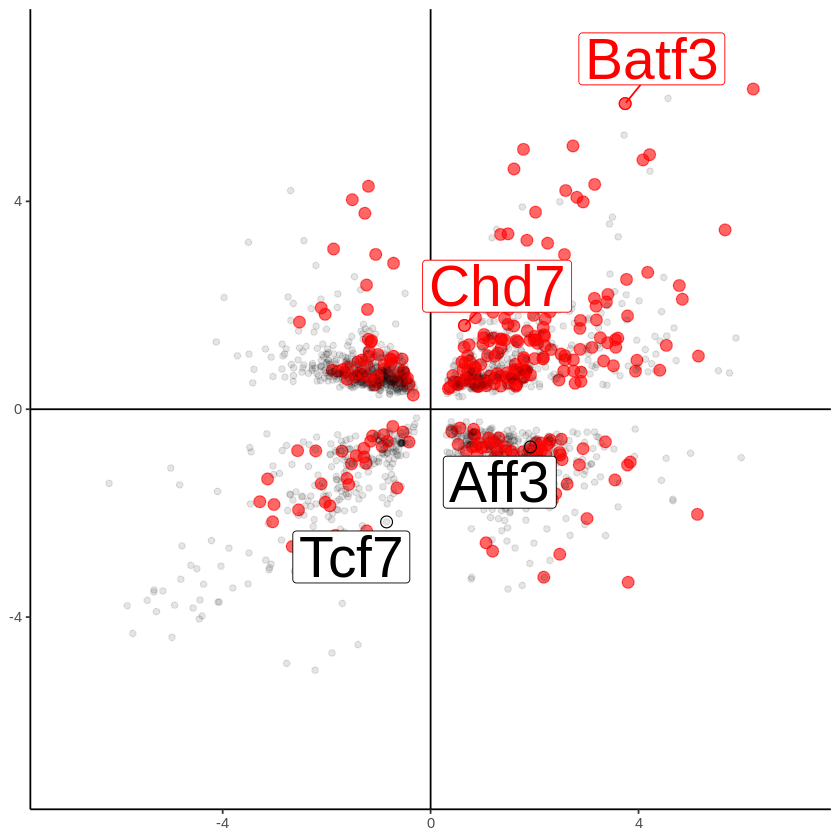

In [13]:
scatter.plot <- ggplot(scatter.df, aes(x=log2FC1, y=log2FC2, color=Highlight, alpha=Highlight, size=Highlight)) +
    geom_point() + 
    scale_color_manual(values=c( "black", "red")) +
    scale_alpha_manual(values=c(0.1, 0.6)) +
    scale_size_manual(values=c(1.5,3)) +
    
    xlim(c(-7, 7)) + ylim(c(-7,7)) +
    geom_vline(xintercept=0) +
    geom_hline(yintercept=0) +
    
    geom_label_repel(data=scatter.anno.df, size=12, alpha=1, force=80, max.iter=100000,
                          aes(x=log2FC1, y=log2FC2, label=gene_name)) +
    geom_point(data=scatter.anno.df, 
               aes(x=log2FC1, y=log2FC2), pch=1, size=3, alpha=1) +
    
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    legend.position = "none")
scatter.plot

In [14]:
out.plot.name <- file.path(meta.dir, "Nascent_IL2dependent_ChIP_scatter.png")
out.csv.name <- file.path(meta.dir, "Nascent_IL2dependent_ChIP_scatter.csv")
ggsave(out.plot.name, scatter.plot)
write.csv(scatter.df, out.csv.name)

Saving 6.67 x 6.67 in image



In [15]:
il2.stat5.promoted.csv.name <- file.path(meta.dir, "Il2-stat5_direct_promoted.csv")
il2.direct.promoted <- scatter.df %>% filter(log2FC1 > 0) %>% filter(log2FC2 > 0) %>% filter(Highlight == "Yes")
il2.direct.promoted <- unique(il2.direct.promoted$gene_name)
il2.direct.promoted.df <- data.frame(il2.direct.promoted )
colnames(il2.direct.promoted.df) <- c("gene_name")
write.csv(il2.direct.promoted.df, il2.stat5.promoted.csv.name)

il2.stat5.repressed.csv.name <- file.path(meta.dir, "Il2-stat5_direct_repressed.csv")
il2.direct.repressed <- scatter.df %>% filter(log2FC1 < 0) %>% filter(log2FC2 < 0) %>% filter(Highlight == "Yes")
il2.direct.repressed <- unique(il2.direct.repressed$gene_name)
il2.direct.repressed.df <- data.frame(il2.direct.repressed )
colnames(il2.direct.repressed.df) <- c("gene_name")
write.csv(il2.direct.repressed.df, il2.stat5.repressed.csv.name)

In [16]:
scatter.df %>% filter(log2FC1 >0) %>% filter(log2FC2>0) %>% .$Highlight %>% table(.)

.
 No Yes 
324 155 

In [17]:
scatter.df %>% filter(log2FC1 >0) %>% filter(log2FC2<0) %>% .$Highlight %>% table(.)

.
 No Yes 
356  70 

In [18]:
scatter.df %>% filter(log2FC1 <0) %>% filter(log2FC2>0) %>% .$Highlight %>% table(.)

.
 No Yes 
456  52 

In [19]:
scatter.df %>% filter(log2FC1 <0) %>% filter(log2FC2<0) %>% .$Highlight %>% table(.)

.
 No Yes 
256  32 